***
<h1 align='center'>  Big Data 2020-2021 Assessment <\h1>

***

## Task 1:

In [86]:
#Importing programs: 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
plt.style.use('seaborn-darkgrid') #Setting the syles for all the graphs plotted in the session

In [87]:
def read_monitoring_data(file_path):
        temp_df = pd.read_csv(file_path,engine='python', skiprows=4,skipfooter=4, na_values='No data')	
        temp_df['Time'] = pd.to_timedelta(temp_df['Time']) # convert the time column to a timedelta variable
        temp_df['Date'] = pd.to_datetime(temp_df['Date'], dayfirst=True) # convert the date column to a datetime
        temp_df.insert(0,'DateTime', temp_df['Date'] + temp_df['Time']) # create a combined datetime column
        return temp_df


marylebone_df = read_monitoring_data('marylebone_road_2020.csv')
headingley_df = read_monitoring_data('headingley_2020.csv')


In [88]:
print(marylebone_df.head()) # Viewing the first few rows of the DataFrame

             DateTime       Date            Time    Ozone   Status  \
0 2020-01-01 01:00:00 2020-01-01 0 days 01:00:00  1.72961  V ugm-3   
1 2020-01-01 02:00:00 2020-01-01 0 days 02:00:00  1.92918  V ugm-3   
2 2020-01-01 03:00:00 2020-01-01 0 days 03:00:00  1.99570  V ugm-3   
3 2020-01-01 04:00:00 2020-01-01 0 days 04:00:00  2.04559  V ugm-3   
4 2020-01-01 05:00:00 2020-01-01 0 days 05:00:00  2.99355  V ugm-3   

   Nitric oxide Status.1  Nitrogen dioxide Status.2  \
0      78.38595  V ugm-3          45.77784  V ugm-3   
1      88.61587  V ugm-3          52.64325  V ugm-3   
2      70.02935  V ugm-3          44.76870  V ugm-3   
3      67.58589  V ugm-3          40.20699  V ugm-3   
4      72.03298  V ugm-3          47.26010  V ugm-3   

   Nitrogen oxides as nitrogen dioxide  ...  \
0                            165.96796  ...   
1                            188.51903  ...   
2                            152.14554  ...   
3                            143.83725  ...   
4            

### The column headings for the Marylebone DataFrame are: 

In [89]:
column_headings_m = list(marylebone_df.columns) #Function that returns a list of all the columns in the DataFrame
print(column_headings_m)
print(marylebone_df.shape)

['DateTime', 'Date', 'Time', 'Ozone', 'Status', 'Nitric oxide', 'Status.1', 'Nitrogen dioxide', 'Status.2', 'Nitrogen oxides as nitrogen dioxide', 'Status.3', 'Sulphur dioxide', 'Status.4', 'Carbon monoxide', 'Status.5', 'PM10 particulate matter (Hourly measured)', 'Status.6', 'Non-volatile PM10 (Hourly measured)', 'Status.7', 'Volatile PM10 (Hourly measured)', 'Status.8', 'PM2.5 particulate matter (Hourly measured)', 'Status.9', 'Non-volatile PM2.5 (Hourly measured)', 'Status.10', 'Volatile PM2.5 (Hourly measured)', 'Status.11', 'PM10 particulate matter (Daily measured)', 'Status.12', 'PM10 particulate matter (Daily measured).1', 'Status.13', 'PM2.5 particulate matter (Daily measured)', 'Status.14', 'PM2.5 particulate matter (Daily measured).1', 'Status.15', 'Daily measured PM10 (uncorrected)', 'Status.16', 'Daily measured PM10 (uncorrected).1', 'Status.17', 'Daily measured PM2.5 (uncorrected)', 'Status.18', 'Daily measured PM2.5 (uncorrected).1', 'Status.19', 'Modelled Wind Direction

In [90]:
# Repeat last few steps for the Headingley DataFrame:
print(headingley_df.head()) 

             DateTime       Date            Time    Ozone   Status  \
0 2020-01-01 01:00:00 2020-01-01 0 days 01:00:00  16.8514  V ugm-3   
1 2020-01-01 02:00:00 2020-01-01 0 days 02:00:00  12.9717  V ugm-3   
2 2020-01-01 03:00:00 2020-01-01 0 days 03:00:00  14.4010  V ugm-3   
3 2020-01-01 04:00:00 2020-01-01 0 days 04:00:00  11.9676  V ugm-3   
4 2020-01-01 05:00:00 2020-01-01 0 days 05:00:00  11.4944  V ugm-3   

   Nitric oxide Status.1  Nitrogen dioxide Status.2  \
0      44.17313  V ugm-3          55.23563  V ugm-3   
1      32.81152  V ugm-3          49.20562  V ugm-3   
2      28.46522  V ugm-3          39.61584  V ugm-3   
3      35.73763  V ugm-3          41.20512  V ugm-3   
4      26.92259  V ugm-3          40.68462  V ugm-3   

   Nitrogen oxides as nitrogen dioxide  ...  \
0                            122.96681  ...   
1                             99.51593  ...   
2                             83.26191  ...   
3                             96.00205  ...   
4            

### The column headings for the Headingley DataFrame are:

In [91]:
column_headings_h = list(headingley_df.columns)
print(column_headings_h)
print(headingley_df.shape)

['DateTime', 'Date', 'Time', 'Ozone', 'Status', 'Nitric oxide', 'Status.1', 'Nitrogen dioxide', 'Status.2', 'Nitrogen oxides as nitrogen dioxide', 'Status.3', 'PM10 particulate matter (Hourly measured)', 'Status.4', 'Non-volatile PM10 (Hourly measured)', 'Status.5', 'Volatile PM10 (Hourly measured)', 'Status.6', 'PM2.5 particulate matter (Hourly measured)', 'Status.7', 'Non-volatile PM2.5 (Hourly measured)', 'Status.8', 'Volatile PM2.5 (Hourly measured)', 'Status.9', 'Modelled Wind Direction', 'Status.10', 'Modelled Wind Speed', 'Status.11', 'Modelled Temperature', 'Status.12']
(7284, 29)


***
## Task 2:

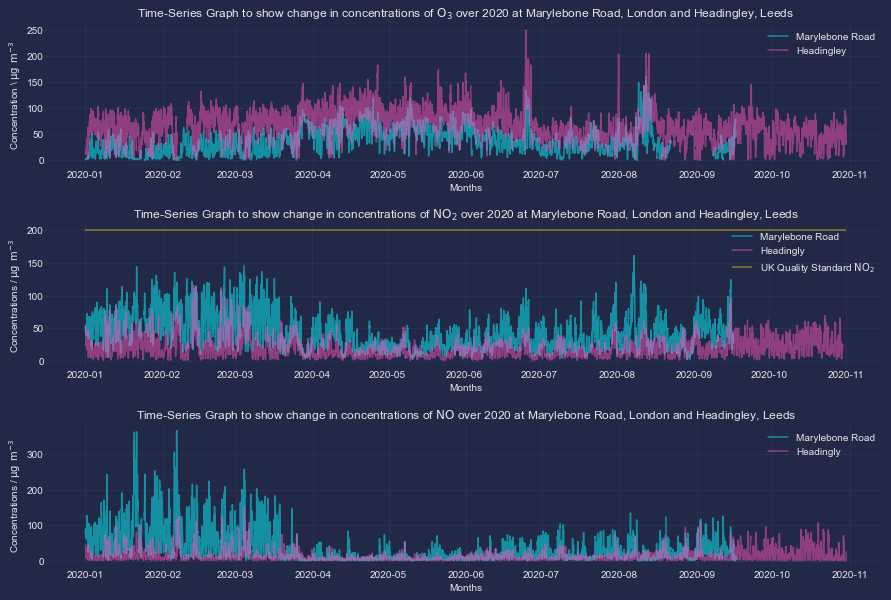

In [118]:
fig1 = plt.figure(figsize=(15, 10)) # Setting figure size 
ax1 = plt.subplot(3, 1, 1) # First plot of a figure with three rows and 1 column
# List of the Hex codes of the colours used in all the graphs for reference and ease: 

# First plotting the Ozone 
ax1.plot(marylebone_df['DateTime'], marylebone_df['Ozone'], label='Marylebone Road', color='#08F7FE', alpha=0.5) # color set using HTML hex code and alpha=intensity of colour
ax1.plot(headingley_df['DateTime'], headingley_df['Ozone'],  label='Headingley', color='#FE53BB', alpha=0.5 )
ax1.set_xlabel('Months') 
ax1.set_ylabel('Concentration \ ' + '$\mathrm{\mu g \: \: m^{-3}}$')
ax1.set_title('Time-Series Graph to show change in concentrations of ' + '$\mathrm{O_3}$' + ' over 2020 at Marylebone Road, London and Headingley, Leeds')
ax1.legend()
# Second plot of the Nitrogen Dioxide: 
ax2 = plt.subplot(3, 1, 2) # Second plot of the figure 
ax2.plot(marylebone_df['DateTime'], marylebone_df['Nitrogen dioxide'], color='#08F7FE', alpha=0.5, label='Marylebone Road')
ax2.plot(headingley_df['DateTime'], headingley_df['Nitrogen dioxide'], color='#FE53BB', alpha=0.5, label='Headingly')
ax2.hlines(200, '2020-01', '2020-11', color='#F5D300', alpha=0.5, label='UK Quality Standard ' + '$\mathrm{NO_2}$' )
ax2.set_xlabel('Months')
ax2.set_ylabel('Concentrations / ' + '$\mathrm{\mu g \: \: m^{-3}}$')
ax2.set_title('Time-Series Graph to show change in concentrations of '  + '$\mathrm{NO_2}$'  + ' over 2020 at Marylebone Road, London and Headingley, Leeds')
ax2.legend(loc='upper right')
# Third plot of Nitric Oxide:
ax3 = plt.subplot(3, 1, 3) # Third plot of the figure
ax3.plot(marylebone_df['DateTime'], marylebone_df['Nitric oxide'], color='#08F7FE', alpha=0.5, label='Marylebone Road') 
ax3.plot(headingley_df['DateTime'], headingley_df['Nitric oxide'], color='#FE53BB', alpha=0.5, label='Headingly')
ax3.set_xlabel('Months')
ax3.set_ylabel('Concentrations / ' + '$\mathrm{\mu g \: \: m^{-3}}$')
ax3.set_title('Time-Series Graph to show change in concentrations of'  + ' $\mathrm{NO}$'  + ' over 2020 at Marylebone Road, London and Headingley, Leeds')
ax3.legend(loc='upper right')

# Setting the background colour of the figure:
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
# Setting the text and axes colour:
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
# Setting the colour of the gridlines:
ax1.grid(color='#2A3459')  # bluish dark grey, but slightly lighter than background
ax2.grid(color='#2A3459')
ax3.grid(color='#2A3459')

plt.subplots_adjust(hspace=0.4)
plt.savefig('Task_2')
plt.show()

The graph above shows that over the period of 2020 Headingley consistently had a higher concentration of Ozone than at the Marylebone site, apart from one area in particular during August where the concentration rose above Headingley (to around 150 $\mathrm{\mu g \: \: m^{-3}}$). The concentration of $\mathrm{O_3}$ at both sites does not seem to alter as much as compared to the Nitrogen Dioxide and nitric acid over the course of the year. What can be said is after April the concentration of Ozone increases slightly, until around july, where is begins to decrease - in some levels to lower than before. 

In contrast the second and third figure for Nitrogen Dioxide and Ntric Oxide respectively, the data taken at the site in Marleybone reports consistently higher concentrations than in Headingley. From the periods of January-March the concentrations seem to be fluctuating around 100 $\mathrm{\mu g \: \: m^{-3}}$, then drops from march onwards at both locations. NO suffers the biggest drop - this can probably be attributed to the fact that NO is a constituent of vehicle exhaust emissions, during lockdown the vast reduction of motor transport can explain why less NO was being emitted into the atmosphere. 

Increase to ozone may be attributed to production from reaction of NO and NO2 to produce O3 - because of lockdown (as NO2 and No are polluntants whose concentrations in the atmosphere are exacerabted by human activity - possible explanation for less feeding of Nox into atmosphere, so reserves of NOx are converted into O3 and subsequent concs. of Nox drop. 

Sharp increases in july and august could be due to relaxing of lockdown restrictions (such as 'eat out to help out') - increase to human activity. 



***
## Task 3: 

#### The highest recorded concentration of $\mathrm{NO_2}$ and it's DateTime for Marylebone Road:

In [93]:
max_no2_m = marylebone_df[marylebone_df['Nitrogen dioxide'] == marylebone_df['Nitrogen dioxide'].max()] #Selecting the concentration for Nitrogen Dioxide that is equal to max
print(max_no2_m[['DateTime', 'Nitrogen dioxide']]) #Printing the date, time and value of the maximum concentration of Nitrogen Dioxide

                DateTime  Nitrogen dioxide
5276 2020-08-07 21:00:00           161.415


#### The highest recorded concentration of $\mathrm{NO_2}$ and it's DateTime for Headingley:

In [94]:
max_no2_h = headingley_df[headingley_df['Nitrogen dioxide'] == headingley_df['Nitrogen dioxide'].max()] # repeated for Headingley
print(max_no2_h[['DateTime', 'Nitrogen dioxide']])

                DateTime  Nitrogen dioxide
1040 2020-02-13 09:00:00         116.11321


From this we can see that the highest recorded concentration for $\mathrm{NO_2}$ was reported at the Marylebone site. 


***
## Task 4: 

#### Marylebone Road:

In [95]:
m_unsmoothed = marylebone_df[['DateTime', 'Ozone']] #Selecting the DateTime and Ozone concentration columns for the Marylebone DataFrame
m_rolling = m_unsmoothed.rolling(window=8).mean() #Finding the 8 hour rolling mean of the Ozone concentration

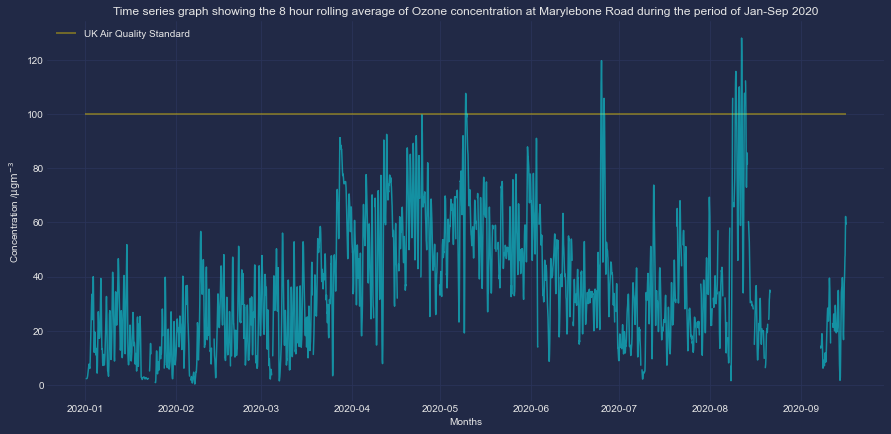

In [96]:
fig2 = plt.figure(figsize=(15,7)) #Setting figure size 
ax= plt.subplot()
ax.plot(marylebone_df['DateTime'], m_rolling['Ozone'], color= '#08F7FE', alpha=0.5) # Plot of Months vs Ozone
ax.hlines(100, marylebone_df['DateTime'].max(), marylebone_df['DateTime'].min(), color='#F5D300', alpha=0.5, label='UK Air Quality Standard')
ax.set_xlabel('Months')
ax.set_ylabel('Concentration /' + '$\mathrm{\mu g m^{-3}}$' )
ax.set_title('Time series graph showing the 8 hour rolling average of Ozone concentration at Marylebone Road during the period of Jan-Sep 2020')
plt.legend()

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
# Setting the text and axes colour:
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
# Setting the colour of the gridlines:
ax1.grid(color='#2A3459')  # bluish dark grey, but slightly lighter than background
ax2.grid(color='#2A3459')
ax3.grid(color='#2A3459')
# Setting the colour of the gridlines:
ax.grid(color='#2A3459')  # bluish dark grey, but slightly lighter than background


plt.savefig('task_4_m')
plt.show()

#### Headingley:

In [97]:
h_unsmoothed = headingley_df[['DateTime', 'Ozone']] # Same repeated for Headingley
h_rolling = h_unsmoothed.rolling(window=8).mean()

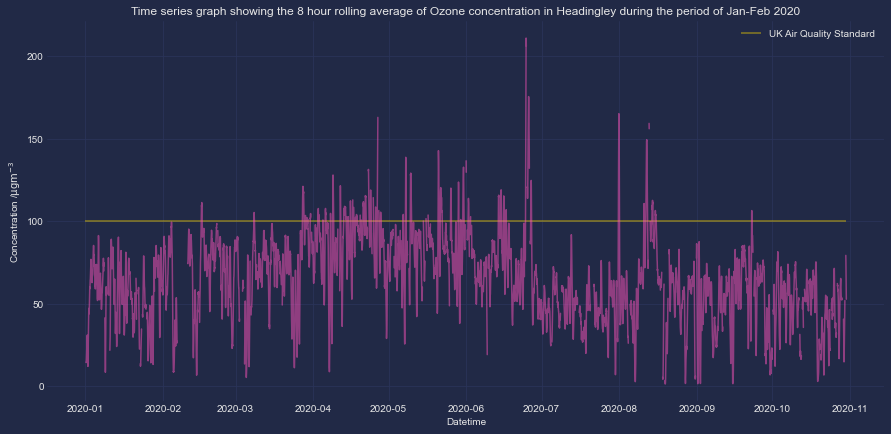

In [98]:
fig3 = plt.figure(figsize=(15, 7))
ax4 = plt.subplot()
ax4.plot(headingley_df['DateTime'], h_rolling['Ozone'], color='#FE53BB', alpha=0.5)
ax4.hlines(100, headingley_df['DateTime'].max(), headingley_df['DateTime'].min(), color='#F5D300', alpha=0.5, label='UK Air Quality Standard')
ax4.set_xlabel('Datetime')
ax4.set_ylabel('Concentration /' + '$\mathrm{\mu g m^{-3}}$' )
ax4.set_title('Time series graph showing the 8 hour rolling average of Ozone concentration in Headingley during the period of Jan-Feb 2020')
plt.legend()

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
# Setting the text and axes colour:
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
# Setting the colour of the gridlines:
ax4.grid(color='#2A3459')  # bluish dark grey, lighter than background


plt.savefig('task_4_h')
plt.show()

In both time-series visualisations above the rolling average can be seen to exceed the standard set by UK air quality. The data obtained in Headingly appears to exceed this more than the the data from Marylebone road, however similiar spikes in the concentrations of Ozone can be observed towards the end of April, the end of June and several during August. 

The graphs seem to suggest that over the period of March-July the concentration seems to increase (before again decreasing to previous level) 

In [99]:
m_ex = m_rolling[m_rolling > 100]
print(m_ex.count())

Ozone    57
dtype: int64


In [100]:
h_ex = h_rolling[h_rolling > 100]
h_ex.count()

Ozone    441
dtype: int64

The above code calculates the amount of datapoints that exceeds 100 $\mathrm{\mu g^{-3}}$. This proves, as said previously, that Headingley exceeded this amount more times that Marylebone.

***
## Task 5: 

#### Marylebone:

Marylebone January-February mean:

In [101]:
marylebone_df.index = marylebone_df['DateTime'] #Re-indexing the DataFrame to the DateTime column for ease of selection by date
marylebone_jf = marylebone_df['Nitrogen dioxide'].loc['2020-01': '2020-02'] #Selection of Nitrogen Dioxide concs. during January
marylebone_jf_mean = marylebone_jf.mean() #Finding the mean of the January concs.
print(marylebone_jf_mean)


62.71559213523134


Marylebone mean for the rest of the year (from April):

In [102]:
marylebone_yr = marylebone_df['Nitrogen dioxide'].loc['2020-04':] #Selection of concs. for all of the datapoints after and including 1st April
marylebone_yr_mean = marylebone_yr.mean()
print(marylebone_yr_mean)

34.05660016262206


In [116]:
m_pctchng = (marylebone_jf_mean - marylebone_yr_mean) / marylebone_jf_mean * 100
m_pctchng # A decrease of 45.7% in Marylebone 

45.69675737225432

#### Headingley:

Headingly January-February mean:

In [103]:
#Repeating steps used for Marylebone data for Headingley:
headingley_df.index = headingley_df['DateTime']
headingley_jf = headingley_df['Nitrogen dioxide'].loc['2020-01':'2020-02']
headingley_jf_mean = headingley_jf.mean()
print(headingley_jf_mean)

24.9615041305891


Headingley mean for the rest of the year (from April): 

In [104]:
headingley_yr = headingley_df['Nitrogen dioxide'].loc['2020-04':]
headingley_yr_mean = headingley_yr.mean()
print(headingley_yr_mean)

16.923599494370958


In [117]:
h_pctchng = (headingley_jf_mean -headingley_yr_mean) / headingley_jf_mean * 100
h_pctchng # 32.2 percentage decrease in Headingley since lockdown 

32.20120307721393

As insinuated in the time-series graph for $\mathrm{NO_2}$ the concentration for both Headingley and Marylebone decreases according to the calculates means above.
It may be worth noting that even once the concentration in Marylebone has dropped it is still higher that the mean for Headingley in Jan-Feb. However the concentration of Nitrogen Dioxide drops the most at Marylebone (45.7%) compared to Headingley (32.2%).

However a simple mean may not be enough to show the true change in concentrations. It may not be representative of the entire period - e.g. can include anomalies and also doesn't tell us a lot about how this concentration changed - may help to deduce why these concentrations have changed. A lot of factors contribute to the change in $\mathrm{NO_2}$ concentration, for all this data suggests it could be a seasonal variation. 

In order to get a clearer picture it may be useful to request data for the concentrations of these onstituents for previous years, to compare whether or not this change is due to seasonal behaviour or as a result of lockdown etc. It could also be beneficial to request traffic volume data, to see how changes in the amount of combustion in motor vehicles changes the concentrations of $\mathrm{NO_X}$ and $\mathrm{O_X}$ in the local atmosphere.


***
## Task 6:

#### Marylebone: 

Diurnal Mean January-February:

In [105]:
marylebone_conc_jan = np.array(marylebone_df['Nitrogen dioxide'][ : '2020-03-01 00:00:00']) # Creating an np array for all of the concs. in January

reshape_m_conc_jan = np.reshape(marylebone_conc_jan, (-1,24 )) # Reshaping into 2D array with 24 columns (hours). -1 means 'unknown' so python finds the amount of rows depending on the number of data points/ columns
print(reshape_m_conc_jan.shape)

jan_diurnal_mean = np.nanmean(reshape_m_conc_jan, axis=0) #Finding mean for each hour across all of January (nanmean = replacing all nan values with mean otherwise would return nan for all)
print(jan_diurnal_mean) #24 values = mean for each hour
times = [(dt.time(t).strftime('%I %p')) for t in range(24)] #Creation of a list of 24 hours. %I = time in 12h clock, %p = AM or PM. 
print(times)

(60, 24)
[49.88350741 39.15322932 35.20991    32.60829644 35.1736739  42.28339458
 57.90824169 69.40387085 73.96781339 77.89082475 74.37000552 76.2731775
 74.32153228 72.52133804 71.71609203 79.35800085 83.43094576 78.58137068
 71.79824034 69.02686678 66.60215559 61.83402271 59.17427085 54.1774539 ]
['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM', '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM', '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM']


Diurnal Mean April onwards: 

In [106]:
marylebone_yr_conc = np.array(marylebone_df['Nitrogen dioxide'].loc['2020-04': '2020-09-15'])

marylebone_yr_reshaped = np.reshape(marylebone_yr_conc, (-1, 24))
marylebone_yr_diurnal = np.nanmean(marylebone_yr_reshaped, axis=0)
print(marylebone_yr_diurnal)

[30.63234792 26.38007392 22.56970327 21.28285976 22.24784886 25.55446371
 32.69507611 38.03722036 38.91108844 37.27337152 35.72070074 36.55397393
 37.20556199 37.86150067 38.53540236 40.42162422 41.83919867 40.61497542
 37.30051548 35.5056362  36.4511019  35.802485   35.43208702 33.13758863]


#### Headingley:

Diurnal Mean January:

In [107]:
headingley_jan_conc = np.array(headingley_df['Nitrogen dioxide'].loc[: '2020-03-01 00:00:00'])

headingley_jan_reshaped = np.reshape(headingley_jan_conc, (-1,24))
headingley_jan_diurnal = np.nanmean(headingley_jan_reshaped, axis=0)
print(headingley_jan_diurnal)

[19.66388586 13.68951603 12.72805288 11.18040186 12.14465729 14.36365831
 22.75984814 32.96802776 36.12411931 33.02349932 30.42584793 25.39894552
 25.1271339  23.22966831 24.55131441 27.20661746 30.65400475 33.99208186
 35.18726814 33.00067271 28.93479051 26.79100169 24.46809797 21.35591051]


Diurnal Mean April Onwards:

In [108]:
headingley_yr_conc = np.array(headingley_df['Nitrogen dioxide'].loc['2020-04': '2020-10-29'])
headingley_yr_reshaped = np.reshape(headingley_yr_conc, (-1,24))
headingley_yr_diurnal = np.nanmean(headingley_yr_reshaped, axis=0)

#### Comparison of the Diurnal Variation of [$\mathrm{NO_2}$] for different periods during 2020: 

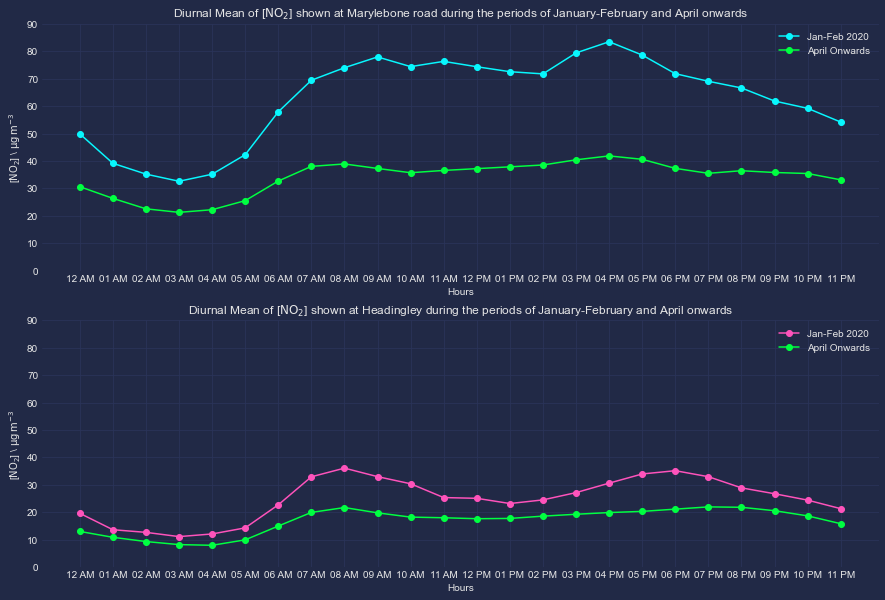

In [109]:
yticks = list(range(0, 100, 10))
figex = plt.figure(figsize=(15,10))

ax_ex1 = plt.subplot(2, 1, 1)
ax_ex1.plot(times, jan_diurnal_mean, color='#08F7FE', label='Jan-Feb 2020', marker='o')
ax_ex1.plot(times, marylebone_yr_diurnal, color='#00ff41', label='April Onwards', marker='o')
ax_ex1.set_title('Diurnal Mean of [$\mathrm{NO_2}$] shown at Marylebone road during the periods of January-February and April onwards')
ax_ex1.set_xlabel('Hours')
ax_ex1.set_yticks(yticks)
ax_ex1.set_ylabel('[$\mathrm{NO_2}$] \ ' + '$\mathrm{\mu g \: m^{-3}}$')
ax_ex1.legend()

ax_ex2= plt.subplot(2, 1, 2)
ax_ex2.plot(times, headingley_jan_diurnal, color='#FE53BB', label='Jan-Feb 2020', marker='o')
ax_ex2.plot(times, headingley_yr_diurnal, color='#00ff41', label='April Onwards', marker='o' )
ax_ex2.set_title('Diurnal Mean of [$\mathrm{NO_2}$] shown at Headingley during the periods of January-February and April onwards')
ax_ex2.set_xlabel('Hours')
ax_ex2.set_yticks(yticks)
ax_ex2.set_ylabel('[$\mathrm{NO_2}$] \ ' + '$\mathrm{\mu g \: m^{-3}}$')
ax_ex2.legend()

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
# Setting the text and axes colour:
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
# Setting the colour of the gridlines:
ax_ex1.grid(color='#2A3459')  # bluish dark grey, but slightly lighter than background
ax_ex2.grid(color='#2A3459')


plt.savefig('task_6')
plt.show()

From this it can be seen that for both sets of data the period from april onwards varies at a lower concentration than in the period over January-February. 

In this graph both the diurnal means for the period of Jan-feb have a bi-modal distribution. One point to be made is that the concentration at Marylebone reaches its lowest points between 3-4 am and around 2 pm with the maximums at 9 am and 4pm. Headingley shows lows (3-4 am, 12-1pm) and highs (8 am , 6pm) at similar times - one explanation of this is that this may reflect rush-hour traffic - expecially considering that post lockdown (April onwards) the distributions on both graphs seem to flatten out, with the maximums in particular becoming less pronounced. This would seem to suggest that the reduction in traffic volume (due to people working from home, schools shut etc.) had a direct effect on the concentration of Nitrogen dioxide. 

Overall, the concentration of $\mathrm{NO_2}$ at Marylebone is higher than in Headingley for the entire variation. However by analysing the change to the initial increase to the concentration it can be seen that althought in the periods of January-February Marylebone shows a steep increase to conc. (around 45 $\mathrm{\mu g \: m^{-3}}$) than Headingley (around 25 $\mathrm{\mu g \: m^{-3}}$), during the subsequent months of lockdown both 

***
## Task 7:

#### Finding total amount of gas in 1 $m{^3}$

In [119]:
temp_c = np.array(marylebone_df['Modelled Temperature'])
temp_k = temp_c + 273 # converting temperature to kelvin

In [121]:
tot_gas = 101325 / (8.314 * temp_k)
print(tot_gas) #Finding the total volume of gas 

[44.2690682  44.41426559 44.47910393 ...         nan         nan
         nan]


#### Marylebone:

In [122]:
#Converting concentrations to ppb
o3_ppb = ((np.array((marylebone_df['Ozone'])/ (10E6 * 48 )) / tot_gas) * 10E9 )
marylebone_df['Ozone /ppb'] = o3_ppb
no2_ppb = ((np.array(marylebone_df['Nitrogen dioxide']) / (10E6 * 46)) / tot_gas) * 10E9
marylebone_df['Nitrogen dioxide / ppb'] = no2_ppb
no_ppb = ((np.array(marylebone_df['Nitric oxide']) / (10E6 * 30)) / tot_gas) * 10E9
marylebone_df['Nitric oxide / ppb'] = no_ppb
print(marylebone_df)

                               DateTime       Date            Time     Ozone  \
DateTime                                                                       
2020-01-01 01:00:00 2020-01-01 01:00:00 2020-01-01 0 days 01:00:00   1.72961   
2020-01-01 02:00:00 2020-01-01 02:00:00 2020-01-01 0 days 02:00:00   1.92918   
2020-01-01 03:00:00 2020-01-01 03:00:00 2020-01-01 0 days 03:00:00   1.99570   
2020-01-01 04:00:00 2020-01-01 04:00:00 2020-01-01 0 days 04:00:00   2.04559   
2020-01-01 05:00:00 2020-01-01 05:00:00 2020-01-01 0 days 05:00:00   2.99355   
...                                 ...        ...             ...       ...   
2020-09-16 08:00:00 2020-09-16 08:00:00 2020-09-16 0 days 08:00:00  45.50196   
2020-09-16 09:00:00 2020-09-16 09:00:00 2020-09-16 0 days 09:00:00  55.68003   
2020-09-16 10:00:00 2020-09-16 10:00:00 2020-09-16 0 days 10:00:00       NaN   
2020-09-16 11:00:00 2020-09-16 11:00:00 2020-09-16 0 days 11:00:00  73.64133   
2020-09-16 12:00:00 2020-09-16 12:00:00 

#### Headingley:

In [123]:
h_temp_c = np.array(headingley_df['Modelled Temperature'])
h_temp_k = h_temp_c + 273

In [124]:
h_tot_gas = 101325 / (8.314 * h_temp_k)

In [125]:
h_o3_ppb = ((np.array(headingley_df['Ozone']) / (10E6 * 48 ))  / h_tot_gas) * 10E9
h_no2_ppb = ((np.array(headingley_df['Nitrogen dioxide'])/ (10E6 * 46)) /h_tot_gas) * 10E9
h_no_ppb = ((np.array(headingley_df['Nitric oxide'])/ (10E6 * 30))/h_tot_gas) * 10E9

In [126]:
headingley_df['Ozone/ppb'] = h_o3_ppb
headingley_df['Nitrogen dioxide/ppb'] = h_no2_ppb
headingley_df['Nitric oxide/ppb'] = h_no_ppb
print(headingley_df)

                               DateTime       Date            Time    Ozone  \
DateTime                                                                      
2020-01-01 01:00:00 2020-01-01 01:00:00 2020-01-01 0 days 01:00:00  16.8514   
2020-01-01 02:00:00 2020-01-01 02:00:00 2020-01-01 0 days 02:00:00  12.9717   
2020-01-01 03:00:00 2020-01-01 03:00:00 2020-01-01 0 days 03:00:00  14.4010   
2020-01-01 04:00:00 2020-01-01 04:00:00 2020-01-01 0 days 04:00:00  11.9676   
2020-01-01 05:00:00 2020-01-01 05:00:00 2020-01-01 0 days 05:00:00  11.4944   
...                                 ...        ...             ...      ...   
2020-10-30 08:00:00 2020-10-30 08:00:00 2020-10-30 0 days 08:00:00  47.7286   
2020-10-30 09:00:00 2020-10-30 09:00:00 2020-10-30 0 days 09:00:00  30.6709   
2020-10-30 10:00:00 2020-10-30 10:00:00 2020-10-30 0 days 10:00:00  33.8705   
2020-10-30 11:00:00 2020-10-30 11:00:00 2020-10-30 0 days 11:00:00  51.2622   
2020-10-30 12:00:00 2020-10-30 12:00:00 2020-10-30 0

***
## Task 8:

#### January-February Marylebone:

In [127]:
m_jan_o3 = np.array(marylebone_df['Ozone /ppb'].loc[:'2020-03-01 00:00:00']) #Selecting Ozone data for January and February 
print(m_jan_o3.shape)
m_jan_o3_reshaped = np.reshape(m_jan_o3, (-1,24)) # reshape into table of 24 columns 
print(m_jan_o3_reshaped.shape)
m_jan_o3_times = m_jan_o3_reshaped[:, 9:16] #selecting data between the hours of 9am to 3pm 
print(m_jan_o3_times.shape)
m_jan_no2 = np.array(marylebone_df['Nitrogen dioxide / ppb'].loc[:'2020-03-01 00:00:00']) #Selecting data for Nitrogen dioxide 
m_jan_no2_reshaped = np.reshape(m_jan_no2, (-1,24))
print(m_jan_no2_reshaped.shape)
m_jan_no2_times = m_jan_no2_reshaped[:, 9:16]
print(m_jan_no2_times.shape)
m_jan_no = np.array(marylebone_df['Nitric oxide / ppb'].loc[:'2020-03-01 00:00:00']) #Selecting data for Nitric oxide 
m_jan_no_reshaped = np.reshape(m_jan_no, (-1,24))
print(m_jan_no_reshaped.shape)
m_jan_no_times = m_jan_no_reshaped[:, 9:16]
print(m_jan_no_times.shape)

(1440,)
(60, 24)
(60, 7)
(60, 24)
(60, 7)
(60, 24)
(60, 7)


In [128]:
#Calculation of NOx and Ox 
m_jan_ox = m_jan_o3_times + m_jan_no2_times
m_jan_nox = m_jan_no2_times + m_jan_no_times
# Deletion of nan values for statistical analysis 
mjan_adjust_ox = m_jan_ox[np.logical_not(np.isnan(m_jan_ox))]
mjan_adjust_nox = m_jan_nox[np.logical_not(np.isnan(m_jan_nox))][:392]
print(mjan_adjust_ox.shape)
print(mjan_adjust_nox.shape)

(392,)
(392,)


In [129]:
# Import scipy 
from scipy.stats import linregress 
# Derivation of slope and intercept 
stats = linregress(mjan_adjust_nox, mjan_adjust_ox)
print(stats)

m = stats.slope
c = stats.intercept



LinregressResult(slope=0.0705631098957673, intercept=36.23572986477508, rvalue=0.48228376857259103, pvalue=3.15323339598898e-24, stderr=0.006490143969121971)


#### January-February Headingley: 

In [130]:
h_jan_o3 = np.array(headingley_df['Ozone/ppb'].loc[:'2020-03-01 00:00:00'])
h_jan_o3_reshaped = np.reshape(h_jan_o3, (-1,24))
h_jan_o3_times = h_jan_o3_reshaped[:, 9:16]
print(h_jan_o3_times.shape)
h_jan_no2 = np.array(headingley_df['Nitrogen dioxide/ppb'].loc[:'2020-03-01 00:00:00'])
h_jan_no2_re = np.reshape(h_jan_no2, (-1,24))
h_jan_no2_t = h_jan_no2_re[:, 9:16]
print(h_jan_no2_t.shape)
h_jan_no = np.array(headingley_df['Nitric oxide/ppb'].loc[:'2020-03-01 00:00:00'])
h_jan_no_re = np.reshape(h_jan_no, (-1,24))
h_jan_no_t = h_jan_no_re[:, 9:16]
print(h_jan_no_t.shape)

(60, 7)
(60, 7)
(60, 7)


In [131]:
h_jan_ox = h_jan_o3_times + h_jan_no2_t #Calculation of Ox from addition of Oxygen concs. and Nitrogen dioxide concs 
h_jan_nox = h_jan_no2_t + h_jan_no_t #Calculation of NOx from addition of Nitrogen dioxide and Nitric acid 
print(h_jan_ox.shape)
print(h_jan_nox.shape)

hjan_adjust_ox = h_jan_ox[np.logical_not(np.isnan(h_jan_ox))]
hjan_adjust_nox = h_jan_nox[np.logical_not(np.isnan(h_jan_nox))][:369]

print(hjan_adjust_ox.shape)
print(hjan_adjust_nox.shape)

(60, 7)
(60, 7)
(369,)
(369,)


In [132]:
stats_h = linregress(hjan_adjust_nox, hjan_adjust_ox) 
print(stats)

m_h = stats_h.slope
c_h = stats_h.intercept

LinregressResult(slope=0.0705631098957673, intercept=36.23572986477508, rvalue=0.48228376857259103, pvalue=3.15323339598898e-24, stderr=0.006490143969121971)


### Plot of $\mathrm{NO_x}$ vs $\mathrm{O_x}$ for January-February 2020

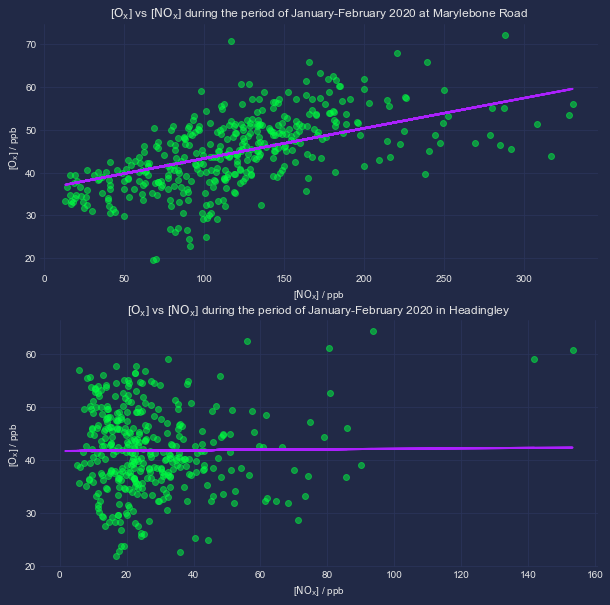

In [133]:
fig4 = plt.figure(figsize=(10,10))
ax8 = plt.subplot(2, 1, 1)
#Plot of scatter graph of NOx vs Ox 
ax8.scatter(m_jan_nox, m_jan_ox, color='#00ff41', alpha=0.5)
# Line of best fit 
ax8.plot(m_jan_nox, m_jan_nox*m + c, color='#ab20fd', linewidth=2)

ax8.set_title('[$\mathrm{O_x}$] vs [$\mathrm{NO_x}$] during the period of January-February 2020 at Marylebone Road')
ax8.set_xlabel('[$\mathrm{NO_x}$] / ppb')
ax8.set_ylabel('[$\mathrm{O_x}$] / ppb')

ax9 = plt.subplot(2, 1, 2)
#Plot of scatter graph of NOx vs Ox 
ax9.scatter(h_jan_nox, h_jan_ox, color='#00ff41', alpha=0.5)
# Line of best fit 
ax9.plot(h_jan_nox, h_jan_nox*m_h + c_h, color='#ab20fd', linewidth=2)

ax9.set_title('[$\mathrm{O_x}$] vs [$\mathrm{NO_x}$] during the period of January-February 2020 in Headingley')
ax9.set_xlabel('[$\mathrm{NO_x}$] / ppb')
ax9.set_ylabel('[$\mathrm{O_x}$] / ppb')


for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
# Setting the text and axes colour:
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
# Setting the colour of the gridlines:
ax8.grid(color='#2A3459')
ax9.grid(color='#2A3459')

plt.savefig('task_8_jan')
plt.show()


Graph 1 - lower intercept, steeper slope 

Graph 2 - higher intercept, flatter slope 

#### April Onwards for Marylebone:

In [134]:
ma_o3 = np.array(marylebone_df['Ozone /ppb'].loc['2020-04': '2020-09-15'])
ma_o3_reshape = np.reshape(ma_o3, (-1,24))
ma_o3_t = ma_o3_reshape[:,9:16]

In [135]:
ma_no2 = np.array(marylebone_df['Nitrogen dioxide / ppb'].loc['2020-04': '2020-09-15'])
ma_no2_reshaped = np.reshape(ma_no2, (-1,24))
ma_no2_t = ma_no2_reshaped[:,9:16]

In [136]:
ma_no = np.array(marylebone_df['Nitric oxide / ppb'].loc['2020-04': '2020-09-15'])
ma_no_reshaped = np.reshape(ma_no, (-1,24))
ma_no_t = ma_no_reshaped[:,9:16]

In [137]:
ma_ox = ma_o3_t + ma_no2_t 
ma_nox = ma_no2_t + ma_no_t 

ma_ox_ad = ma_ox[np.logical_not(np.isnan(ma_ox))]
ma_nox_ad = ma_nox[np.logical_not(np.isnan(ma_nox))][:1014]
print(ma_ox_ad.shape)
print(ma_nox_ad.shape)

(1014,)
(1014,)


In [138]:
stats_ma = linregress(ma_nox_ad, ma_ox_ad)
print(stats_ma)

m_ma = stats_ma.slope
c_ma = stats_ma.intercept

LinregressResult(slope=-0.016584519973489115, intercept=43.49074708723339, rvalue=-0.02565127301616185, pvalue=0.414528935388248, stderr=0.020317057005043184)


### April Onwards Headingley 

In [139]:
ha_o3 = np.array(headingley_df['Ozone/ppb'].loc['2020-04': '2020-09-15'])
ha_o3_reshaped = np.reshape(ha_o3, (-1,24))
ha_o3_t = ha_o3_reshaped[:,9:16]


In [140]:
ha_no2 = np.array(headingley_df['Nitrogen dioxide/ppb'].loc['2020-04': '2020-09-15'])
ha_no2_reshaped = np.reshape(ha_no2, (-1,24))
ha_no2_t = ha_no2_reshaped[:, 9:16]

In [141]:
ha_no = np.array(headingley_df['Nitric oxide/ppb'].loc['2020-04': '2020-09-15'])
ha_no_reshaped = np.reshape(ha_no, (-1,24))
ha_no_t = ha_no_reshaped[:,9:16]

In [142]:
ha_ox = ha_o3_t + ha_no2_t 
ha_nox = ha_no2_t + ha_no_t 

ha_ox_ad = ha_ox[np.logical_not(np.isnan(ha_ox))]
ha_nox_ad = ha_nox[np.logical_not(np.isnan(ha_nox))][:1133]
print(ha_ox_ad.shape)
print(ha_nox_ad.shape)

(1133,)
(1133,)


In [143]:
stats_ma = linregress(ha_nox_ad, ha_ox_ad)
print(stats_ma)

m_ha = stats_ma.slope
c_ha = stats_ma.intercept 

LinregressResult(slope=-0.08324098473169378, intercept=47.05385458022476, rvalue=-0.06118145783020597, pvalue=0.03949157982403957, stderr=0.040380504573667424)


### $\mathrm{NO_x}$ vs $\mathrm{O_x}$ for April onwards 2020 

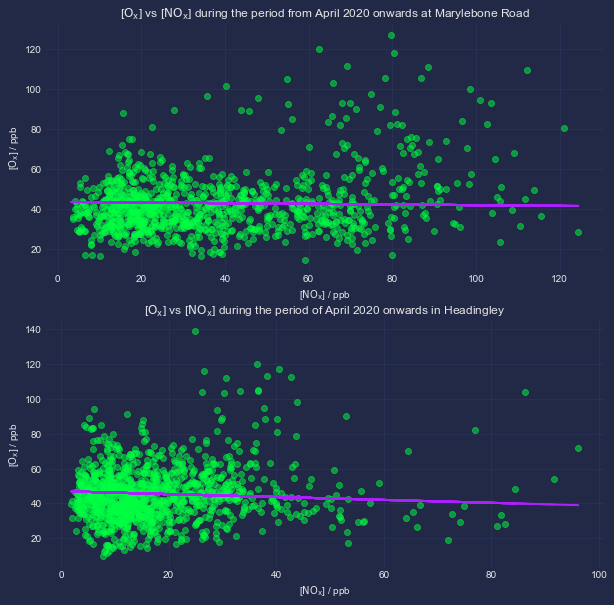

In [144]:
fig6 = plt.figure(figsize=(10,10))
ax12 = plt.subplot(2, 1, 1)
#Plot of scatter graph of NOx vs Ox 
ax12.scatter(ma_nox, ma_ox, color='#00ff41', alpha=0.5)
# Line of best fit 
ax12.plot(ma_nox, ma_nox*m_ma + c_ma, color='#ab20fd', linewidth=2)

ax12.set_title('[$\mathrm{O_x}$] vs [$\mathrm{NO_x}$] during the period from April 2020 onwards at Marylebone Road')
ax12.set_xlabel('[$\mathrm{NO_x}$] / ppb')
ax12.set_ylabel('[$\mathrm{O_x}$] / ppb')

ax13 = plt.subplot(2, 1, 2)
#Plot of scatter graph of NOx vs Ox 
ax13.scatter(ha_nox, ha_ox, color='#00ff41', alpha=0.5)
# Line of best fit 
ax13.plot(ha_nox, ha_nox*m_ha + c_ha, color='#ab20fd', linewidth=2)

ax13.set_title('[$\mathrm{O_x}$] vs [$\mathrm{NO_x}$] during the period of April 2020 onwards in Headingley')
ax13.set_xlabel('[$\mathrm{NO_x}$] / ppb')
ax13.set_ylabel('[$\mathrm{O_x}$] / ppb')


for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
# Setting the text and axes colour:
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
# Setting the colour of the gridlines:
ax12.grid(color='#2A3459')
ax13.grid(color='#2A3459')

plt.savefig('task_8_arilonwards')
plt.show()

During the January to February periods, the slopes for both the Marylebone plot and Headingley plot show a positive relationship – that is to say an increase of O3 is in some way related to NO2. From knowledge of the chemical reactions that take place it is can be assumed that photolysis of NO2 to NO which goes on to produce O3 means that an increase to the concentration of NO2 results in an increase to O3. In the Marylebone graph this relationship is a lot stronger than the Headingly plot (has a steeper slope). From the time-series graph, it is known that Headingley had a higher concentration of Ozone than Marylebone yet a lower concentration of NO2 and NO – this would suggest that there are other factors contributing to the Ozone in Headingley. 

For both plots after April, the slopes become negative. From previous graphs it was able to be identified that during these months the Ozone concentration increased slightly before decreasing; whilst the NO2 decreased almost immediately. The assumption that can be made here is that left over NO2 and NO continued to react to produce O3 (maybe also because other constituents in the atmosphere, caused by human activity, that may react to break down O3¬ also dropped), this would cause the concentrations of NOx constituents to decrease because they are also not being replaced by emissions from anthropologic sources due to the lockdown put in place in march. 

The lifetime of O3 in polluted urban areas is thought to be around hours to weeks, which would explain why in July the concentration of O3 began to decrease, as well as the fact that left over molecules used to break down O3 limited it’s concentration from increasing too much– a few weeks after NO and NO2 had  reached their minimum (concentrations of NO2 and NO became limiting factor). This would explain why the observed plots shown for the period after April show a much flatter slope as the Ozone did not immediately decrease after and decrease to NO2 and NO. This could also suggest that there are other factors that are affecting the concentration of Ozone at this time. 


***
***

## Conclusion

From this data analysis it can be concluded that the effect of lockdown revealed the level of which the concentrations of NO2 and NO in the urban areas of Marylebone and Headingley relied on anthropologic sources (e.g. as emissions from motor vehicles); shown by the decrease to the concentrations overall during the months of lockdown, as well as a diurnal effect from the drop in NO2 levels compared to January-February at rush hour times. 

The relationship between O3 with NO2 and NO¬ was a little more complicated in the respect that O3 and NO2 showed a positive relationship in January-February, suggesting that increases to NO2 would mean an increase to O3 – which can be said to be true from the knowledge of atmospheric catalytic cycles (as more NO2 results in more production of O3). However, the negative relationship shown after April, would suggest that decreases of NO2 does not necessarily result in a decrease to O3 – perhaps because the result of destruction of NO2 is as a direct result of production to O3. This suggests that other factors control the variation of O3 in the atmosphere- specifically, it’s destruction.

To get a clearer picture of how the relationship of O3 was affected by the events in 2020, its would be beneficial to collect data contributions to urban atmosphere from anthropologic sources(e.g. Traffic volumes), as well as other atmospheric constituents (e.g. VOC’s) that may have an affect on O3.  


***
***

### Resources 

https://www.ccacoalition.org/en/slcps/tropospheric-ozone

https://www.canva.com/design/DAEU0b4dh2A/fY9rryWs5k9e6Ix2k1qgCA/edit (design of infographic)

https://www.airnow.gov/air-quality-and-health/your-health/